In [1]:
import java.util.stream.DoubleStream;

var x =
    DoubleStream.concat(DoubleStream.iterate(- Math.PI, t -> t < Math.PI, t -> t + 0.01),
                        DoubleStream.of(Math.PI))
    .toArray();
var cosx = DoubleStream.of(x).map(t -> Math.cos(t)).toArray();
var sinx = DoubleStream.of(x).map(t -> Math.sin(t)).toArray();

# JFreeChart

https://zetcode.com/java/jfreechart/

https://www.jfree.org/jfreechart/api/javadoc/

In [2]:
%%pom
---
dependencies:
- org.jfree:jfreechart:LATEST

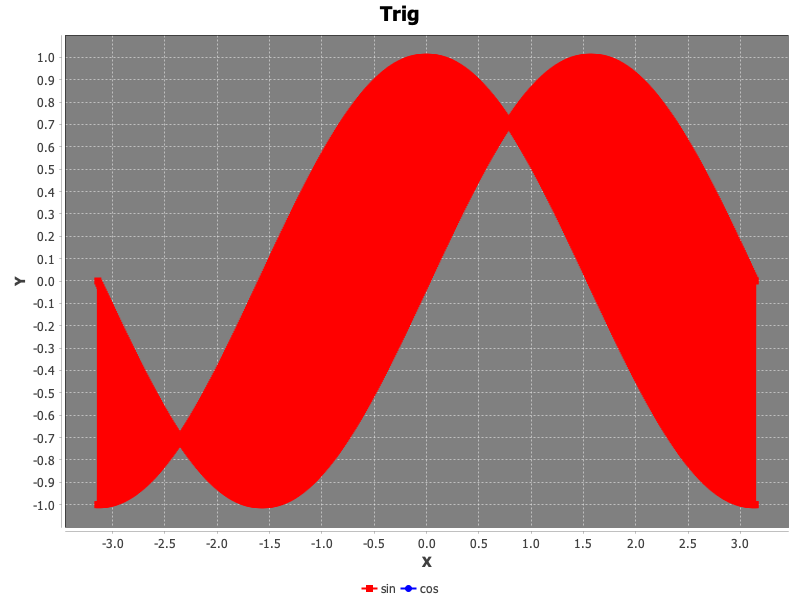

In [3]:
import java.awt.BasicStroke;
import java.awt.Color;
import org.jfree.chart.ChartFactory;
import org.jfree.chart.JFreeChart;
import org.jfree.chart.plot.PlotOrientation;
import org.jfree.chart.plot.XYPlot;
import org.jfree.chart.renderer.xy.XYLineAndShapeRenderer;
import org.jfree.data.xy.XYDataItem;
import org.jfree.data.xy.XYDataset;
import org.jfree.data.xy.XYSeries;
import org.jfree.data.xy.XYSeriesCollection;

var sin = new XYSeries("sin");

for (int i = 0; i < x.length; i += 1) {
    sin.add(new XYDataItem(x[i], sinx[i]));
}

XYSeries cos = new XYSeries("cos");

for (var i = 0; i < x.length; i += 1) {
    sin.add(new XYDataItem(x[i], cosx[i]));
}

var collection = new XYSeriesCollection();

collection.addSeries(sin);
collection.addSeries(cos);

var jfreechart =
    ChartFactory.createXYLineChart("Trig", "X", "Y", collection,
                                   PlotOrientation.VERTICAL, true, true, false);

var plot = jfreechart.getXYPlot();
var renderer = new XYLineAndShapeRenderer();

plot.setRenderer(renderer);
plot.setBackgroundPaint(Color.gray);
plot.setRangeGridlinesVisible(true);
plot.setDomainGridlinesVisible(true);

renderer.setSeriesPaint(0, Color.RED);
renderer.setSeriesStroke(0, new BasicStroke(2.0f));
renderer.setSeriesPaint(1, Color.BLUE);
renderer.setSeriesStroke(1, new BasicStroke(2.0f));

print(jfreechart);

# Tablesaw

https://jtablesaw.github.io/tablesaw/userguide/Introduction_to_Plotting

In [4]:
%%pom
---
dependencies:
- tech.tablesaw:tablesaw-jsplot:LATEST

In [5]:
import tech.tablesaw.api.DoubleColumn;
import tech.tablesaw.api.Table;
import tech.tablesaw.plotly.components.Figure;
import tech.tablesaw.plotly.api.LinePlot;

var table =
    Table.create(DoubleColumn.create("x", x),
                 DoubleColumn.create("sinx", sinx),
                 DoubleColumn.create("cosx", cosx));

print(LinePlot.create("Trig", table, "x", "sinx"));
print(LinePlot.create("Trig", table, "x", "cosx"));
/*
 * Note: Javascript will not be visible in GitHub's static HTML rendering.
 */

# XChart

https://knowm.org/open-source/xchart/xchart-example-code/

In [6]:
%%pom
dependencies:
- org.knowm.xchart:xchart:LATEST

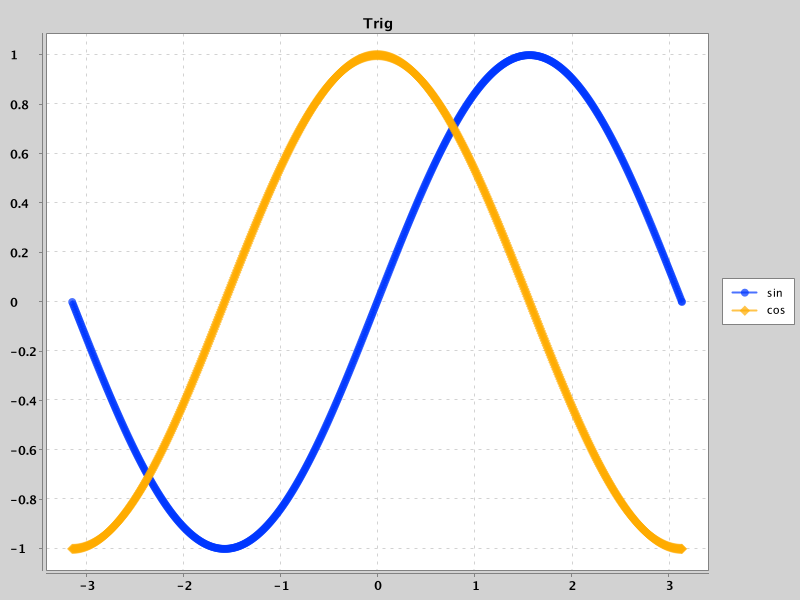

In [7]:
import org.knowm.xchart.XYChart;
import org.knowm.xchart.XYChartBuilder;

var xchart = new XYChartBuilder().title("Trig").build();

xchart.addSeries("sin", x, sinx);
xchart.addSeries("cos", x, cosx);

print(xchart);